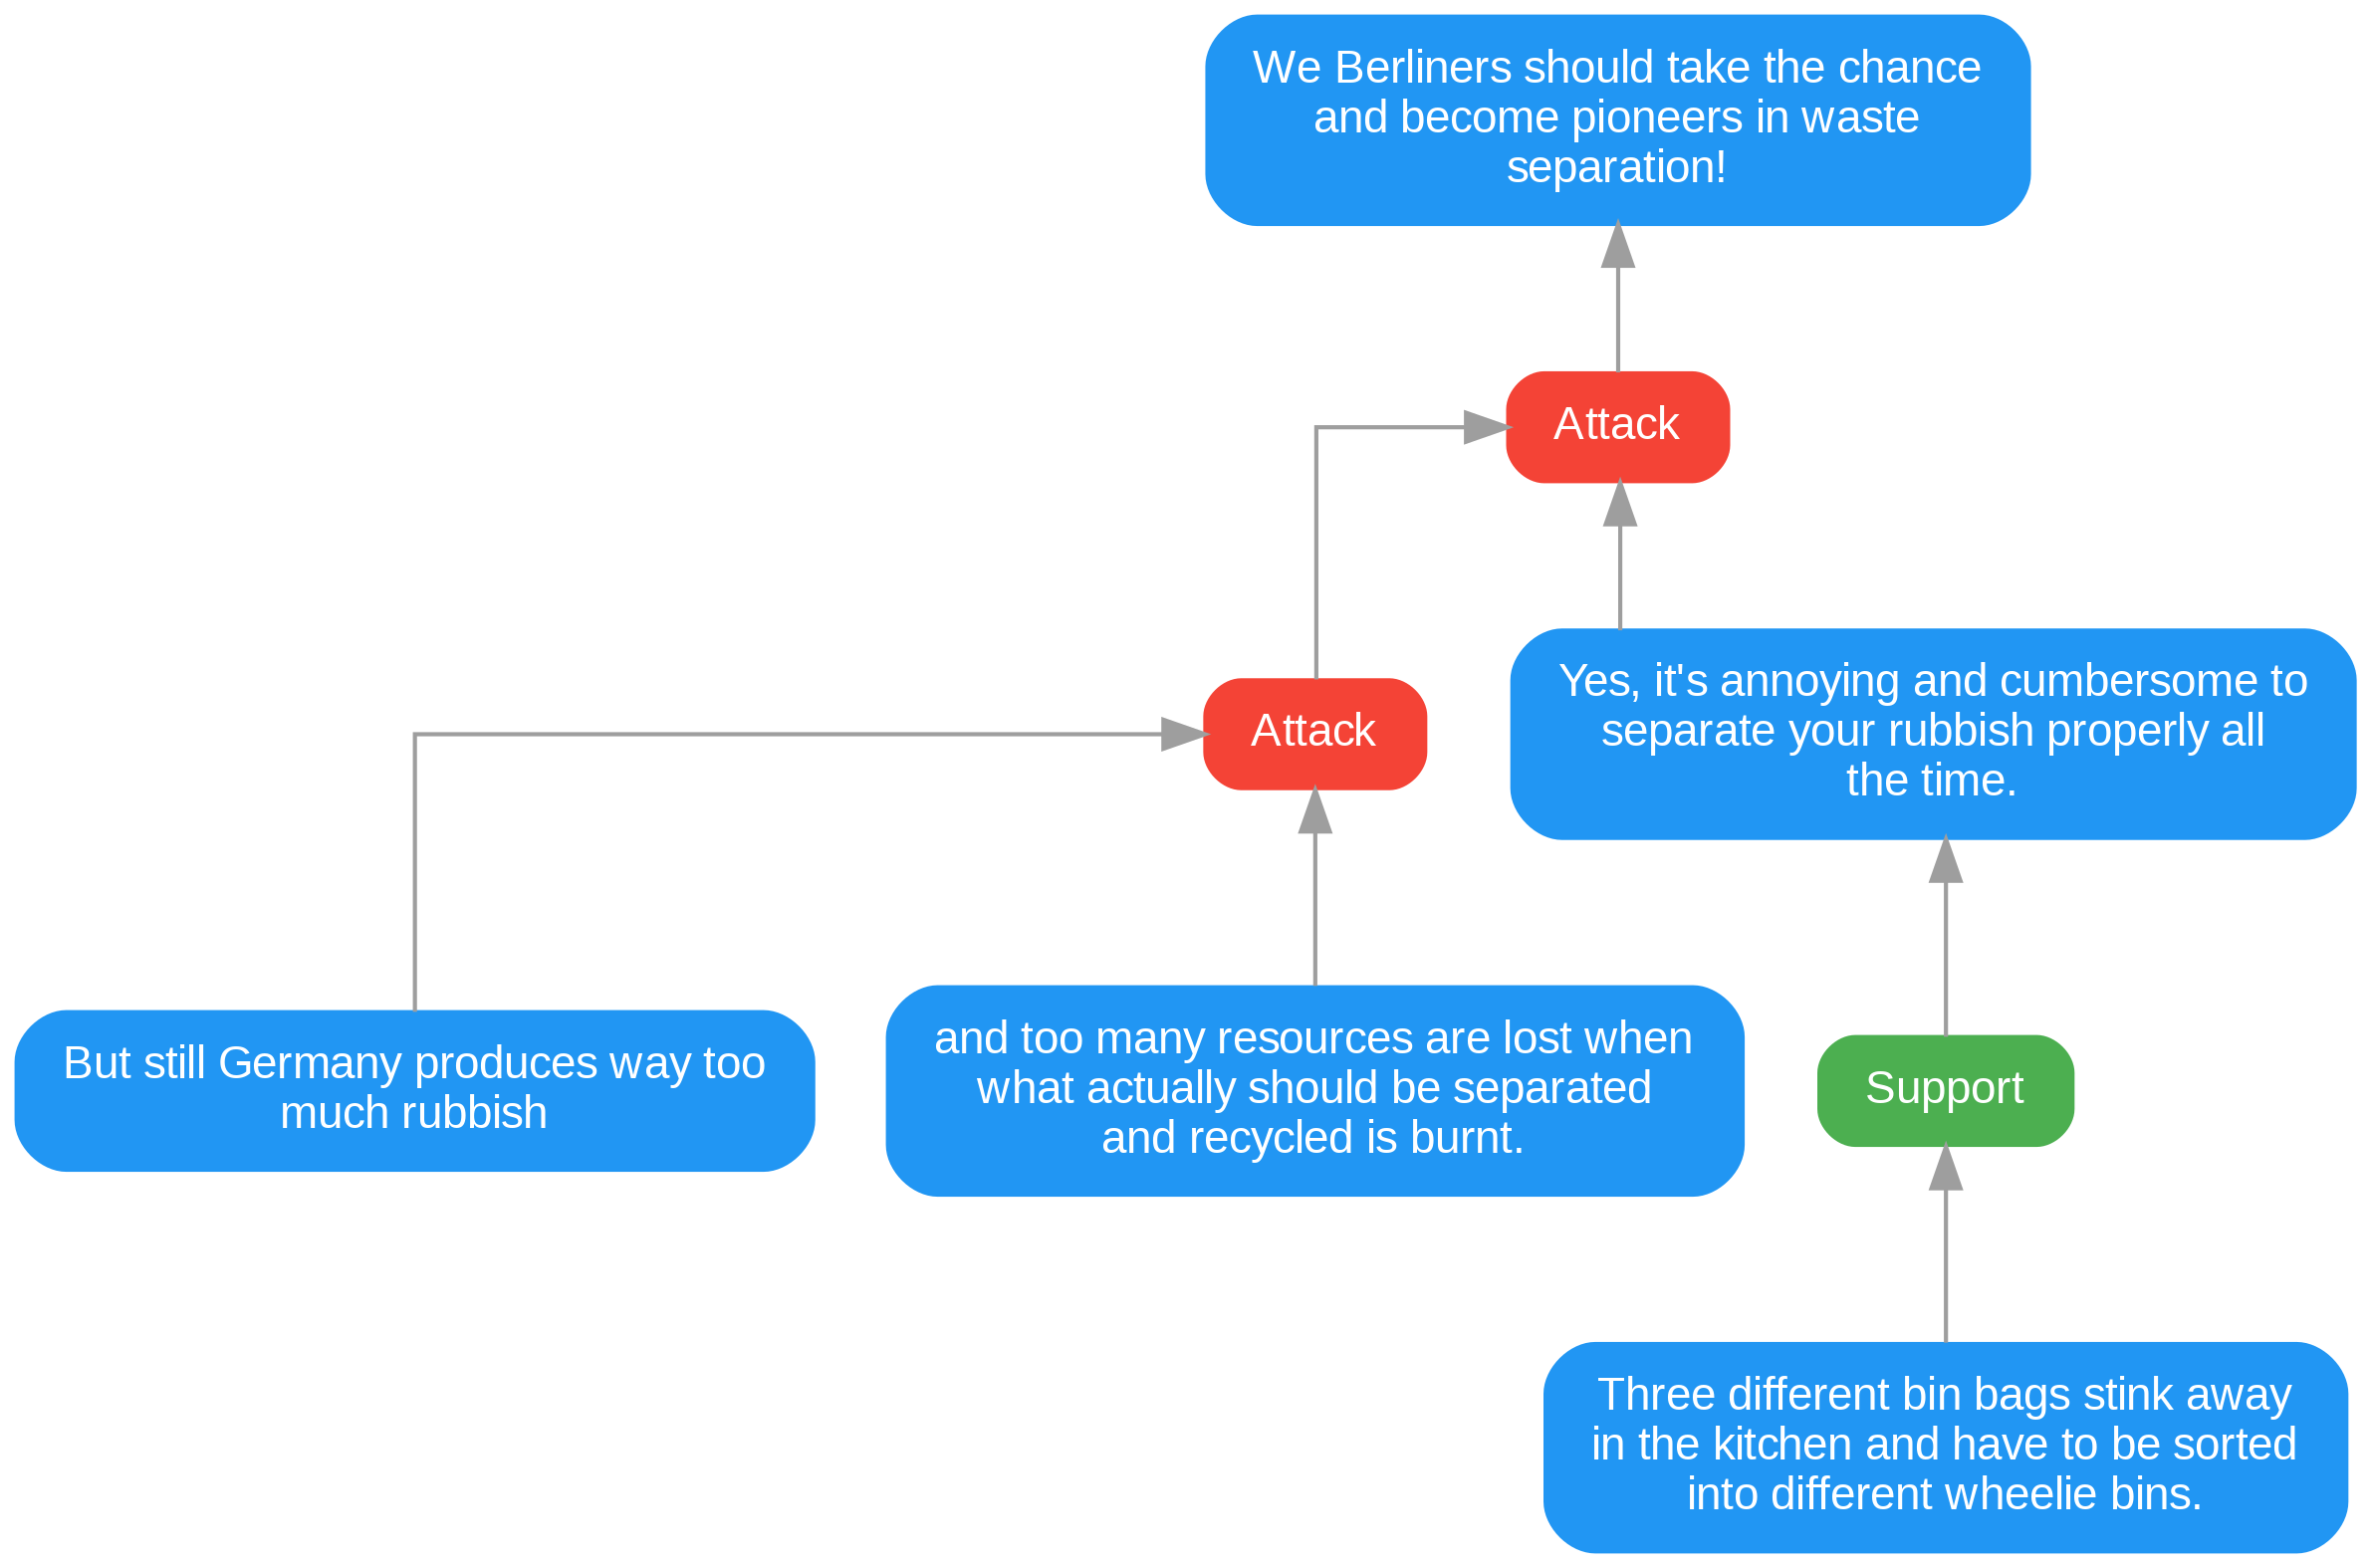

In [1]:
import arguebuf as ab
from PIL import Image
from os import chdir

chdir("./similarity_change_for_nodechange/")

sample_graph = ab.load.file("../../data/graphs/microtexts/nodeset6361.json")
ab.render.graphviz(ab.dump.graphviz(sample_graph), "sample_graph.png")
Image.open("sample_graph.png")


In [2]:
import arguebuf as ab
def swap_schema_node(graph: ab.Graph, node_id: str):
    node = graph.nodes[node_id]
    incoming = [node for node in graph.incoming_nodes(node_id)]
    outgoing = [node for node in graph.outgoing_nodes(node_id)]
    print(incoming, outgoing)
    new_node = ab.SchemeNode(ab.Attack.DEFAULT) if node.label == 'Support' else ab.SchemeNode(ab.Support.DEFAULT)
    graph.remove_node(node)
    graph.add_node(new_node)
    for node in incoming:
        graph.add_edge(ab.Edge(node, new_node))
    for node in outgoing:
        graph.add_edge(ab.Edge(new_node, node))

In [3]:
variation_nodes = [sample_graph.nodes[node] for node in sample_graph.scheme_nodes]
print(variation_nodes)
for node in variation_nodes:
    sample_graph = ab.load.file("../../data/graphs/microtexts/nodeset6361.json")
    swap_schema_node(sample_graph, node.id)
    ab.render.graphviz(ab.dump.graphviz(sample_graph), f"sample_graph_altered_{node.id}.png")

[SchemeNode(119932, Attack, Default), SchemeNode(119933, Support, Default), SchemeNode(119934, Attack, Default)]


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/microtexts/nodeset6361.json'

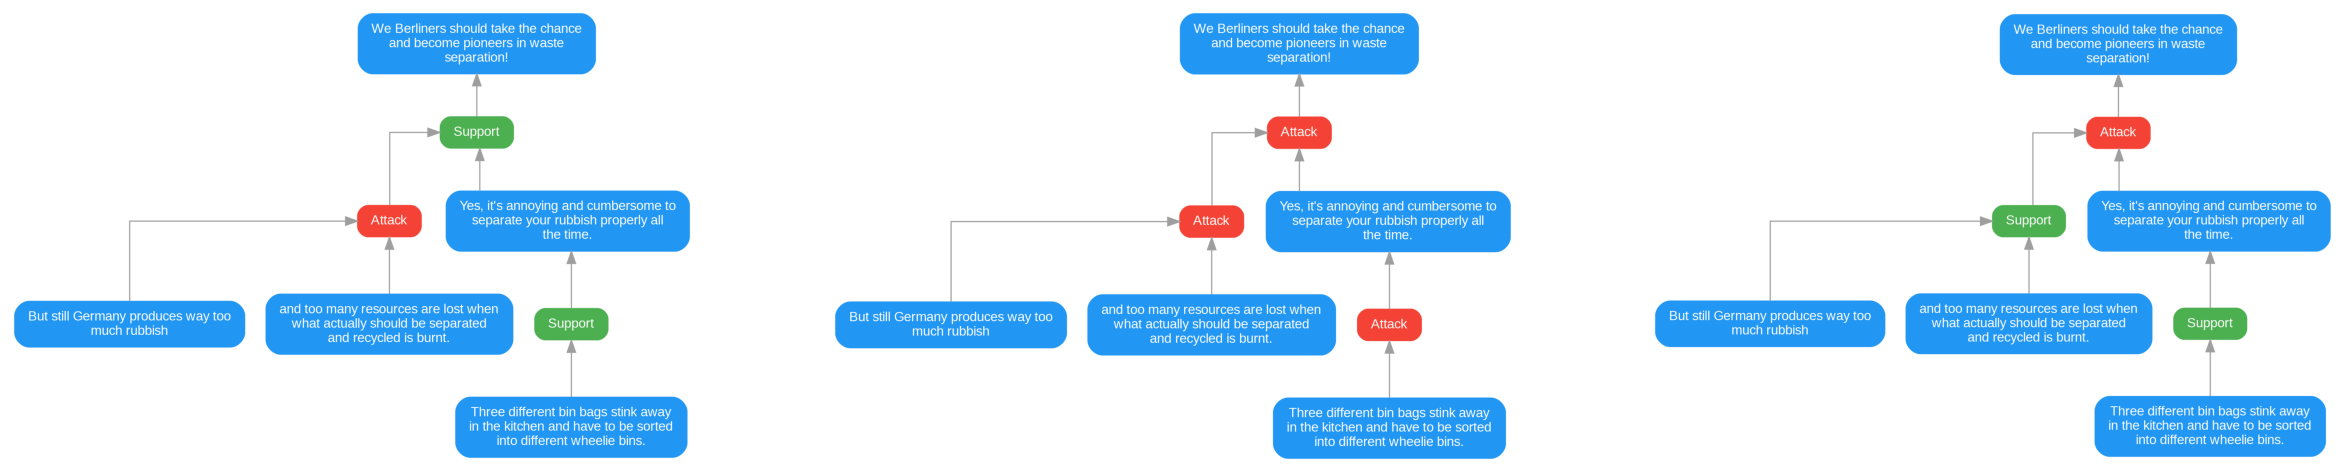

In [4]:
import matplotlib.pyplot as plt
# display all the images
fig, axs = plt.subplots(1, len(variation_nodes), figsize=(30, 20))
for i, node in enumerate(variation_nodes):
    img = Image.open(f"sample_graph_altered_{node.id}.png")
    axs[i].imshow(img)
    axs[i].axis('off')

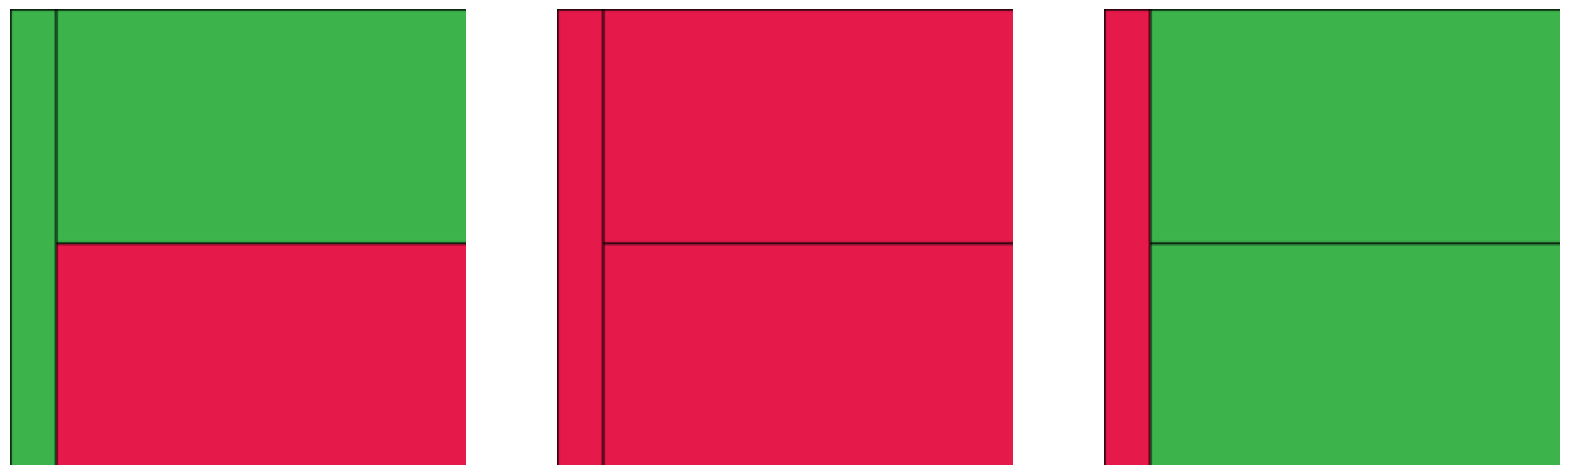

In [5]:
import matplotlib.pyplot as plt
# display all the images
fig, axs = plt.subplots(1, len(variation_nodes), figsize=(20, 20))
for i, node in enumerate(variation_nodes):
    img = Image.open(f"sample_graph_altered_{node.id}_treemap.png")
    axs[i].imshow(img)
    axs[i].axis('off')

In [6]:
from make_treemap_Snodes import visualize_treemap_inmem, standard_resize
for node in variation_nodes:
    sample_graph = ab.load.file("../graphs/microtexts/nodeset6361.json")
    swap_schema_node(sample_graph, node.id)
    outpath = f"./sample_graph_altered_{node.id}_treemap.png"
    visualize_treemap_inmem(sample_graph, outpath)
    standard_resize(outpath)

[SchemeNode(119934, Attack, Default), AtomNode(119927, Yes, it's annoying and cumbersome to separate your rubbish properly all the time.)] [AtomNode(119931, We Berliners should take the chance and become pioneers in waste separation!)]
[AtomNode(119928, Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.)] [AtomNode(119927, Yes, it's annoying and cumbersome to separate your rubbish properly all the time.)]
[AtomNode(119930, and too many resources are lost when what actually should be separated and recycled is burnt.), AtomNode(119929, But still Germany produces way too much rubbish)] [SchemeNode(119932, Attack, Default)]


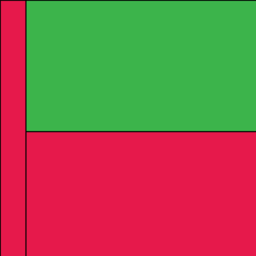

In [7]:
from make_treemap_Snodes import visualize_treemap, standard_resize
visualize_treemap("../graphs/microtexts/nodeset6361.json", "./sample_graph_treemap.png")
standard_resize("./sample_graph_treemap.png")
Image.open("./sample_graph_treemap.png")

In [8]:
# eval treemap sat long
from evaluate_cbr.new_eval.load_trained_model import load_pt, load_ft
from transformers import AutoImageProcessor
import pandas as pd
import torch
import torch.nn.functional as F
TINY = "microsoft/swinv2-tiny-patch4-window8-256"
processor = AutoImageProcessor.from_pretrained(TINY)
model = load_ft(TINY, f"v4", "../../evaluate_cbr/models/ft_long_statedicts.pt")

def embedd(image):
    inputs = processor(image, return_tensors="pt")
    outputs = model(**inputs)
    return outputs.pooler_output

orig = embedd(Image.open("sample_graph.png"))
altered = [embedd(Image.open(f"sample_graph_altered_{node.id}_treemap.png").convert("RGB")) for node in variation_nodes]

# compute the cosine similarity
cos = F.cosine_similarity(orig, torch.stack(altered), dim=-1)
cos
for node, sim in zip(variation_nodes, cos):
    print(f"Similarity of {node.id}: {sim.item():.10f}")


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Similarity of 119932: 0.9927509427
Similarity of 119933: 0.9918317199
Similarity of 119934: 0.9928396940


{'119927': AtomNode(119927, Yes, it's annoying and cumbersome to separate your rubbish properly all the time.), '119928': AtomNode(119928, Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.), '119929': AtomNode(119929, But still Germany produces way too much rubbish), '119930': AtomNode(119930, and too many resources are lost when what actually should be separated and recycled is burnt.), '119931': AtomNode(119931, We Berliners should take the chance and become pioneers in waste separation!), '119932': SchemeNode(119932, Attack, Default), '119933': SchemeNode(119933, Support, Default), '119934': SchemeNode(119934, Attack, Default)}


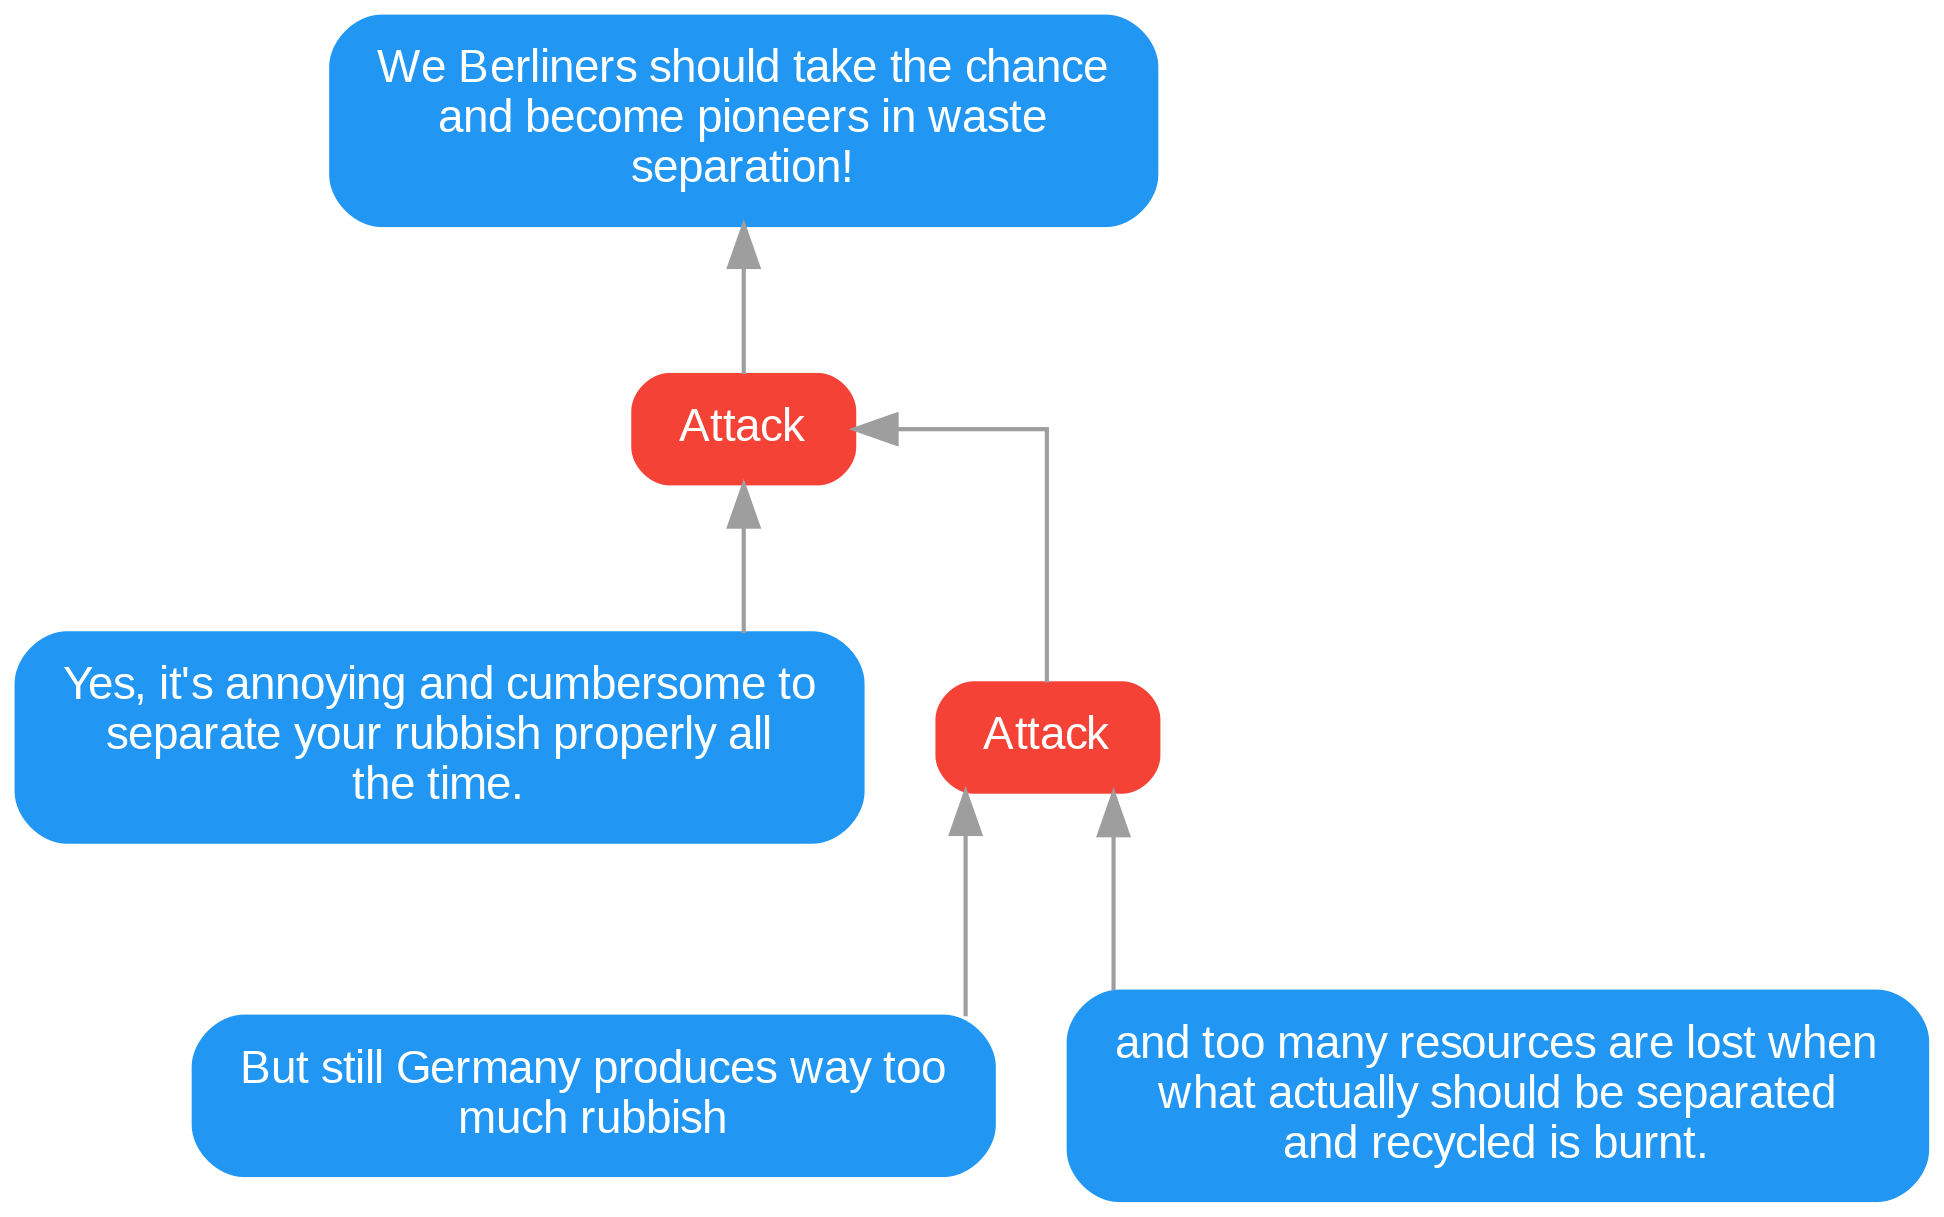

In [9]:
sample_graph = ab.load.file("../graphs/microtexts/nodeset6361.json")
print(sample_graph.nodes)
node = sample_graph.nodes['119933']
node2 = sample_graph.nodes['119928']
sample_graph.remove_node(node)
sample_graph.remove_node(node2)
ab.render.graphviz(ab.dump.graphviz(sample_graph), "sample_graph_r1.png")
Image.open("sample_graph_r1.png")

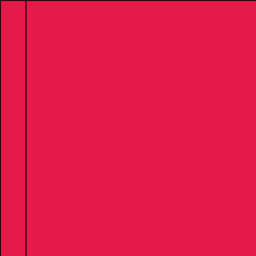

In [10]:
from make_treemap_Snodes import visualize_treemap_inmem, standard_resize
visualize_treemap_inmem(sample_graph, "./sample_graph_r1_treemap.png")
standard_resize("./sample_graph_r1_treemap.png")
Image.open("./sample_graph_r1_treemap.png")

In [11]:
# eval treemap sat long
from evaluate_cbr.new_eval.load_trained_model import load_pt, load_ft
from transformers import AutoImageProcessor
import pandas as pd
import torch
import torch.nn.functional as F
TINY = "microsoft/swinv2-tiny-patch4-window8-256"
processor = AutoImageProcessor.from_pretrained(TINY)
model = load_ft(TINY, f"v4", "../../evaluate_cbr/models/ft_long_statedicts.pt")

def embedd(image):
    inputs = processor(image, return_tensors="pt")
    outputs = model(**inputs)
    return outputs.pooler_output

orig = embedd(Image.open("sample_graph.png")).to(torch.float64)
altered = embedd(Image.open(f"sample_graph_r1_treemap.png").convert("RGB")).to(torch.float64)

# compute the cosine similarity
cos = F.cosine_similarity(orig, altered, dim=-1)
cos


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


tensor([0.9918], dtype=torch.float64, grad_fn=<SumBackward1>)

In [12]:
print('{:.10f}'.format(cos.item()))

0.9918225578


In [13]:
import os
os.getcwd()

'/home/kilian/ba-complete/data/similarity_change_for_nodechange'

In [14]:
# find graph with 20 s-nodes
import arguebuf as ab
from glob import glob
files = glob("../graphs/**/*.json")
for file in files:
    graph = ab.load.file(file)
    if "qt30" not in file and len([node for node in graph.scheme_nodes]) > 20 and len([node for node in graph.scheme_nodes]) < 30:
        print(file)
        break

../graphs/kialo-graphnli/8678.json


In [15]:
g = ab.load.file("../graphs/kialo-graphnli/4401.json")
len([node for node in g.scheme_nodes])

693

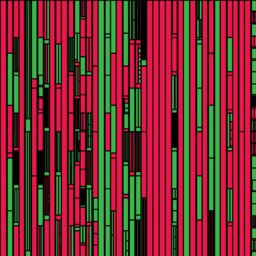

In [16]:
visualize_treemap("../graphs/kialo-graphnli/4401.json", "./sample_graph_large_treemap.png")
standard_resize("./sample_graph_large_treemap.png")
Image.open("./sample_graph_large_treemap.png")

In [19]:
g = ab.load.file("../graphs/kialo-graphnli/8678.json")
len([node for node in g.scheme_nodes])

29

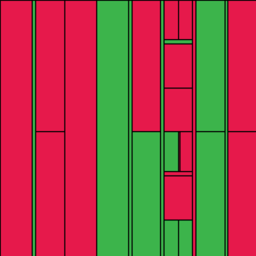

In [17]:
visualize_treemap("../graphs/kialo-graphnli/8678.json", "./sample_graph_medium_treemap.png")
standard_resize("./sample_graph_medium_treemap.png")
Image.open("./sample_graph_medium_treemap.png")

In [18]:
# eval treemap sat long
from evaluate_cbr.new_eval.load_trained_model import load_pt, load_ft
from transformers import AutoImageProcessor
import pandas as pd
import torch
import torch.nn.functional as F
TINY = "microsoft/swinv2-tiny-patch4-window8-256"
processor = AutoImageProcessor.from_pretrained(TINY)
model = load_ft(TINY, f"v4", "../../evaluate_cbr/models/ft_long_statedicts.pt")

def embedd(image):
    inputs = processor(image, return_tensors="pt")
    outputs = model(**inputs)
    return outputs.pooler_output

orig = embedd(Image.open("sample_graph.png")).to(torch.float64)
altered = embedd(Image.open(f"sample_graph_large_treemap.png").convert("RGB")).to(torch.float64)
altered2 = embedd(Image.open(f"sample_graph_medium_treemap.png").convert("RGB")).to(torch.float64)

# compute the cosine similarity
cos = F.cosine_similarity(orig, torch.stack([altered, altered2]), dim=-1)
for node, sim in zip(variation_nodes, cos):
    print(f"Similarity of {node.id}: {sim.item():.10f}")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Similarity of 119932: 0.9919315078
Similarity of 119933: 0.9915608947


# Test Scaling in regards to graph size

In [1]:
import arguebuf as ab
from glob import glob

FOLDER_CB = "retrieval_scaling/cb"
FOLDER_QUERIES = "retrieval_scaling/queries"

In [1]:

import os
import shutil
if os.path.exists("retrieval_scaling"):
    shutil.rmtree("retrieval_scaling")

os.makedirs(FOLDER_CB)
os.makedirs(FOLDER_QUERIES)

files = glob("graphs/kialo-graphnli/*.json")
file_nodes = {}
for file in files:
    graph = ab.load.file(file)
    file_nodes[file] = len(graph.scheme_nodes)
# sort by number of nodes
sorted_files = sorted(file_nodes.items(), key=lambda x: x[1], reverse=False)
# sorted_files[:20]

In [2]:
graph_nodes = set()
new_list = []
for file, num_nodes in sorted_files:
    if num_nodes in graph_nodes:
        continue
    graph_nodes.add(num_nodes)
    new_list.append((file, num_nodes))

In [3]:
cb = ab.load.file(new_list[16][0]) # 20 nodes

In [6]:
from make_treemap_Snodes import visualize_treemap_inmem, standard_resize
cb_path = "retrieval_scaling/cb/20.png"
visualize_treemap_inmem(cb, cb_path)
standard_resize(cb_path)

NameError: name 'cb' is not defined

In [2]:
cb_path = "retrieval_scaling/cb/20.png"

In [3]:
queries = glob("/home/kilian/arguelauncher/data/scaling_requests/*.json")
queries.sort(key=lambda x: int(x.split("/")[-1].split(".")[0]))
queries = [ab.load.file(file) for file in queries]

In [4]:
FOLDER = FOLDER_QUERIES
times = {}
avg_times = {}
sizes = []
from make_treemap_Snodes import visualize_treemap_inmem, standard_resize
from time import time
for j in range(10):
    for i, graph in enumerate(queries):
        size = len(graph.scheme_nodes)
        if size not in sizes:
            sizes.append(size)
        path = f"{FOLDER}/{size}.png"
        start = time()
        visualize_treemap_inmem(graph, path)
        standard_resize(path)
        times[size] = [time() - start] if size not in times else times[size] + [time() - start]
for size, time_list in times.items():
    avg_times[size] = sum(time_list) / len(time_list)

In [5]:
max(times.values())

[0.2571120262145996,
 0.09819316864013672,
 0.09921860694885254,
 0.09848713874816895,
 0.09837126731872559,
 0.09835672378540039,
 0.09841728210449219,
 0.0985262393951416,
 0.09885191917419434,
 0.09788084030151367]

In [6]:
print(avg_times.items())

dict_items([(4, 0.026985788345336915), (5, 0.02692415714263916), (6, 0.027882647514343262), (7, 0.02837824821472168), (8, 0.029209446907043458), (9, 0.03028099536895752), (10, 0.03082118034362793), (11, 0.03151814937591553), (12, 0.03200209140777588), (13, 0.0324519157409668), (14, 0.03408503532409668), (15, 0.03479304313659668), (16, 0.03530795574188232), (17, 0.043724870681762694), (18, 0.03701584339141846), (19, 0.03753054141998291), (20, 0.03841807842254639), (21, 0.03972303867340088), (22, 0.0401383638381958), (23, 0.040558600425720216), (24, 0.07279198169708252), (25, 0.04205067157745361), (26, 0.06277277469635009), (27, 0.043375611305236816), (28, 0.0443610429763794), (29, 0.04445028305053711), (30, 0.04599747657775879), (31, 0.04685800075531006), (32, 0.04725856781005859), (33, 0.04858248233795166), (34, 0.04875757694244385), (35, 0.04951133728027344), (36, 0.04975237846374512), (37, 0.05056476593017578), (38, 0.05160508155822754), (39, 0.053074193000793454), (40, 0.05361199378

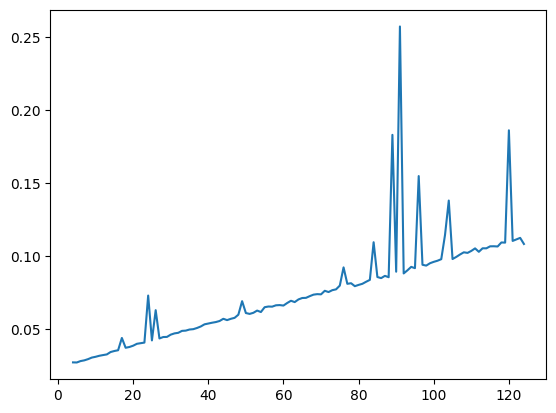

In [7]:
# plot avg_times
import matplotlib.pyplot as plt
plt.plot(avg_times.keys(), avg_times.values())
plt.show()

In [8]:
from evaluate_cbr.new_eval.load_trained_model import load_pt, load_ft
from transformers import AutoImageProcessor
import pandas as pd
import torch
import torch.nn.functional as F
from PIL import Image
embedding_times = {}
TINY = "microsoft/swinv2-tiny-patch4-window8-256"
processor = AutoImageProcessor.from_pretrained(TINY)
model = load_ft(TINY, f"v4", "../evaluate_cbr/models/ft_long_statedicts.pt")

def embedd(image):
    inputs = processor(image, return_tensors="pt")
    outputs = model(**inputs)
    return outputs.pooler_output

for j in range(10):
    images = glob(f"{FOLDER}/*.png")
    images_pil = [Image.open(image).convert("RGB") for image in images]
    images_embedded = []
    for i in range(len(images)):
        start = time()
        images_embedded.append(embedd(images_pil[i]))
        embedding_times[sizes[i]] = [time() - start] if sizes[i] not in embedding_times else embedding_times[sizes[i]] + [time() - start]
    cb_img = embedd(Image.open(cb_path).convert("RGB"))
avg_embedding_times = {size: sum(times) / len(times) for size, times in embedding_times.items()}

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [9]:
cos_times = {}
for j in range(10):
    for i in range(len(images)):
        start = time()
        F.cosine_similarity(cb_img, images_embedded[i], dim=-1)
        cos_times[sizes[i]] = [time() - start] if sizes[i] not in cos_times else cos_times[sizes[i]] + [time() - start]
avg_cos_times = {size: sum(times) / len(times) for size, times in cos_times.items()}

In [10]:
# A* results
res = """
4,705
7,254
17,739
11,611
16,660
15,673
319,389
34,860
152,421
34,454
72,905
99,875
70,052
156,583
92,982
109,439
"""
astar_times = {}
astar = res.replace(",", ".").split()
for i in range(len(sizes[:16])):
    astar_times[sizes[i]] = float(astar[i])
# new times from arguelauncer/combine_data.ipynb
astar_times = astar_times | {21: 583.1426552820485, 22: 352.93988140299916, 23: 1968.3755269719986, 24: 138.96564826904796, 25: 830.2504579459783, 26: 1694.2849450740032, 27: 4470.0782571970485, 28: 322.59936724603176, 29: 1734.4804777950048, 30: 3694.885228915955, 31: 1077.4939379290445, 32: 1204.0192908509634, 33: 1356.791274649091, 34: 867.9759116229834, 35: 1316.3642489089398, 36: 5012.9396054690005, 37: 1611.4490906269057, 38: 787.6964099609759, 39: 734.5470939190127, 40: 4348.625474424916, 41: 2023.781593258027, 42: 1802.351480958052, 43: 2550.355987926945, 44: 3322.069814487011, 45: 7573.2170934820315, 46: 14081.520188921946, 47: 8117.291840499034, 48: 5790.964227367076, 49: 10254.180509043974, 50: 4755.55852430989, 51: 2717.719237916055, 52: 2300.7716033729957, 53: 4023.5037187340204, 54: 6304.664951022016, 55: 5796.458030981012, 56: 4100.9764139580075, 57: 2292.7294746659463}

In [11]:
avg_times

{4: 0.026985788345336915,
 5: 0.02692415714263916,
 6: 0.027882647514343262,
 7: 0.02837824821472168,
 8: 0.029209446907043458,
 9: 0.03028099536895752,
 10: 0.03082118034362793,
 11: 0.03151814937591553,
 12: 0.03200209140777588,
 13: 0.0324519157409668,
 14: 0.03408503532409668,
 15: 0.03479304313659668,
 16: 0.03530795574188232,
 17: 0.043724870681762694,
 18: 0.03701584339141846,
 19: 0.03753054141998291,
 20: 0.03841807842254639,
 21: 0.03972303867340088,
 22: 0.0401383638381958,
 23: 0.040558600425720216,
 24: 0.07279198169708252,
 25: 0.04205067157745361,
 26: 0.06277277469635009,
 27: 0.043375611305236816,
 28: 0.0443610429763794,
 29: 0.04445028305053711,
 30: 0.04599747657775879,
 31: 0.04685800075531006,
 32: 0.04725856781005859,
 33: 0.04858248233795166,
 34: 0.04875757694244385,
 35: 0.04951133728027344,
 36: 0.04975237846374512,
 37: 0.05056476593017578,
 38: 0.05160508155822754,
 39: 0.053074193000793454,
 40: 0.05361199378967285,
 41: 0.05416667461395264,
 42: 0.0546265

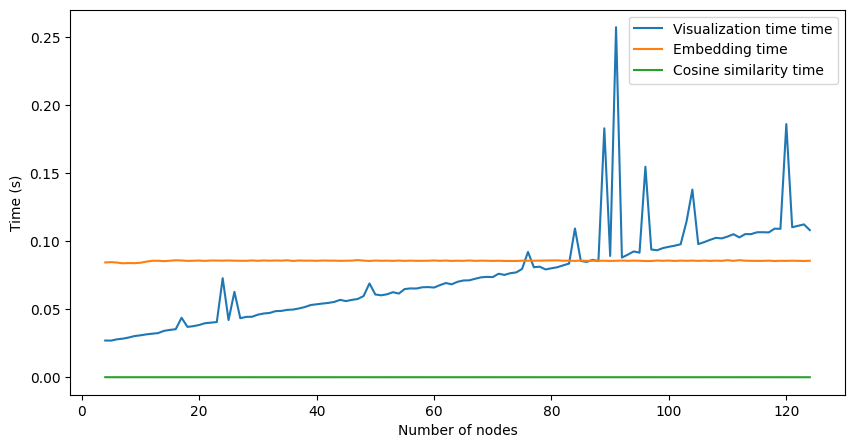

In [12]:
# plot embedding_times and times
import matplotlib.pyplot as plt
import numpy as np

total_time = []
for size in sizes:
    total_time.append(avg_times[size] + avg_embedding_times[size] + avg_cos_times[size])

plt.figure(figsize=(10, 5))
plt.plot(list(avg_times.keys()), list(avg_times.values()), label="Visualization time time")
plt.plot(list(avg_embedding_times.keys()), list(avg_embedding_times.values()), label="Embedding time")
plt.plot(list(avg_cos_times.keys()), list(avg_cos_times.values()), label="Cosine similarity time")
plt.xlabel("Number of nodes")
plt.ylabel("Time (s)")
plt.legend()

plt.show()

<Figure size 1000x500 with 0 Axes>

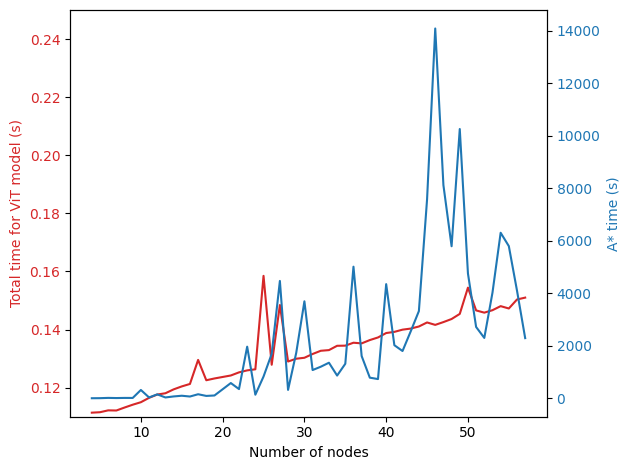

In [16]:
plt.figure(figsize=(10, 5))
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
color = "tab:red"
ax1.set_xlabel("Number of nodes")
ax1.set_ylabel("Total time for ViT model (s)", color=color)
ax1.plot(list(astar_times.keys()), total_time[:53], color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax1.set_ylim(0.11, .25)  # Set y-axis limits from 0 to 2 seconds

ax2 = ax1.twinx()
# plt.ylim(0, .25)  # Set y-axis limits from 0 to 2 seconds
color = "tab:blue"
ax2.set_ylabel("A* time (s)", color=color)
ax2.plot(list(astar_times.keys()), list(astar_times.values()), label="A* time")
ax2.tick_params(axis="y", labelcolor=color)
fig.tight_layout()

plt.show()

In [ ]:
total_time[:16]

[0.09861629009246826,
 0.0921647310256958,
 0.09358718395233154,
 0.0937662124633789,
 0.09430959224700929,
 0.09498279094696044,
 0.0958606243133545,
 0.09616339206695555,
 0.09710471630096436,
 0.09759044647216797,
 0.0982419729232788,
 0.09965488910675048,
 0.09960019588470459,
 0.101627779006958,
 0.10210072994232178,
 0.10179555416107176]

In [ ]:
0.12510523796081544 / 0.0989159107208252

1.2647635456130566

In [ ]:
# copy file to
from shutil import copyfile
copyfile(new_list[16][0], "/home/kilian/arguelauncher/data/scaling_cases/20.json")
DESTFOLDER = "/home/kilian/arguelauncher/data/scaling_requests"
for file, size in new_list[:120]:
    copyfile(file, f"{DESTFOLDER}/{size}.json")

NameError: name 'new_list' is not defined

## Reason for outliers
- file system busy, background processes
- number of I-Nodes might be drastically different

In [ ]:
# calculate estimed time for 10000 S-Nodes

n = 10_000

b = avg_times[15]
m = (avg_times[120] - avg_times[15]) / (120 - 15)
b + m * (n - 15)

9.651294049762544

In [ ]:
m * 1000

0.9633073352632068